file: 2-微积分.ipynb  
site: github.com/IYATT-yx/learning  

Copyright (C) 2021 IYATT-yx (Zhao Hongfei, 赵洪飞)，2514374431@qq.com
This program is free software: you can redistribute it and/or modify
it under the terms of the GNU Affero General Public License as published
by the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.
This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU Affero General Public License for more details.
You should have received a copy of the GNU Affero General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.

In [1]:
import numpy as np

In [2]:
try:
    import scipy as scp
except ModuleNotFoundError:
    !pip3 install scipy
finally:
    from scipy.integrate import *

## 数值积分常用函数

|函数名|描述（未注明的在 SciPy 中）|
|:-|:-|
|quad|单积分|
|dblquad|二重积分|
|tplquad|三重积分|
|nquad|n 倍多重积分|
|fixed_quad|高斯积分，阶数为 n|
|quadrature|高斯正交到容差|
|romberg|Romberg 积分|
|trapz|梯形规则|
|cumtrapz|梯形法则累积计算积分|
|simps|辛普森的规则|
|romb|Romberg 积分|
|polyint|分析多项式积分（NumPy)|
|polyld|辅助函数（NumPy)|

## 积分定义

$$\int_a^b f(x) \mathrm{d} x = \lim_{\lambda \to 0} \sum_{i=1}^n f(\xi) \Delta x_i$$

计算机求解定积分的算法思路：将求积区间进行 n 等分，步长为 $\frac{b-a}{n}$ ，循环 n 次求解 n 个小梯形面积之和，结果即为定积分的近似解  

1.分割：$$a=x_0<x_1<x_2<...<x_{i-1}<x_i<...<x_n=b$$  
2.近似：$$\Delta S_i \approx f(\xi) \Delta x_i，\xi _i \in [x_{i-1},x_i]，\Delta x_i = x_i - x_{i-1}，i=1,2,...,n$$  
3.求和：$$\sum_{i=1}^n f(\xi _i) \Delta x_i$$  
4.求极限：$$\lim_{\lambda \to 0} \sum_{i=1}^n f(\xi _i) \Delta x_i$$

## 定积分性质

性质1  
$\int_a^b [f(x) \pm g(x)] \mathrm{d} x = \int_a^b f(x) \mathrm{d} x \pm \int_a^b g(x) \mathrm{d} x$

性质2  
$\int_a^b kf(x) \mathrm{d} x = k \int_a^b f(x) \mathrm{d} x$

性质3  
$\int_a^b f(x) \mathrm{d} x = \int_a^c f(x) \mathrm{d} x + \int_c^b f(x) \mathrm{d} x$

性质4  
$如果在区间 [a,b] 上，f(x) \geq 0，则 \int_a^b f(x) \mathrm{d} x \geq 0，a < b$

性质5  
$如果在区间 [a,b] 上，f(x)=1，则 \int_a^b 1 \mathrm{d} x = \int_a^b \mathrm{d} x = b-a$  
推论1  
$如果在区间 [a,b] 上，f(x) \leq g(x)，则 \int_a^b f(x) \mathrm{d} x \leq \int_a^b g(x) \mathrm{d} x，a<b$  
推论2  
$在区间 [a,b] 上，|\int_a^b f(x) \mathrm{d} x| \leq \int_a^b |f(x)| \mathrm{d} x，a<b$

性质6 - 积分中值定理  
$如果函数 f(x) 在闭区间 [a,b] 上连续，则在积分区间 [a,b] 上至少存在一点 \xi，使式子成立：\int_a^b f(x) \mathrm{d} x = f(\xi)(b-a)，a \leq \xi \leq b$

微分中值定理  
$F'(\xi)(b-a)=F(b)-F(a)$

牛顿-莱布尼茨公式包含：积分中值定理 & 微分中值定理

$$\int_0^3 cos^2 (e^x) \mathrm{d} x$$

In [3]:
# 使用 SciPy
f = lambda x: np.cos(np.exp(x)) ** 2
quad(f, 0, 3)  # 积分值，误差

(1.296467785724373, 1.3977971863744082e-09)

In [4]:
# 不借助第三方库，利用定义求解
def trape(n):
    '''数值计算
    '''
    f = lambda x: np.cos(np.exp(x)) ** 2
    a, b = 0, 3
    h = (b - a) / n
    x = a
    sum = 0
    for i in range(1, n):
        x2 = a + i * h
        sum = sum + (f(x) + f(x2)) * h / 2
        x = x2
    return sum

# 分段数依次取 10、100、1000、10000、100000
print(trape(10))
print(trape(100))
print(trape(1000))
print(trape(10000))
print(trape(100000))

0.9448223264053134
1.2843391540917448
1.2960750567338157
1.296434741500134
1.2964645400078034


$$\int_1^2 (x^2 + \frac{1}{x^4}) \mathrm{d} x$$

牛顿-莱布尼茨法

$=(\frac{x^3}{3}-\frac{1}{3x^3})|_1^2 = \frac{21}{8} = 2.625$

SciPy

In [5]:
quad(lambda x: x ** 2 + 1 / x ** 4, 1, 2)

(2.625, 2.914335439641036e-14)

$$\int_{-1}^0 \frac{3x^4 + 3x^2 + 1}{x^2 + 1} \mathrm{d} x$$

$=(3x^2 + \ arctanx)|_{-1}^0=1+\frac{\pi}{4}\approx 1.785398163$

In [6]:
quad(lambda x: (3 * x ** 4 + 3 * x ** 2 + 1) / (x ** 2 + 1), -1, 0)

(1.7853981633974483, 1.9821901491273144e-14)

$$\iint_De^{-x^2-y^2}\mathrm{d}x\mathrm{d}y，D=\{(x,y)|0\leq x\leq10,0\leq y\leq10\}$$

In [7]:
x_a = 0
x_b = 10
y_a = 0
y_b = 10

dblquad(lambda x, y: np.exp(-x ** 2 - y ** 2), x_a, x_b, lambda x:y_a, lambda x: y_b)

(0.7853981633974476, 1.3753098510194181e-08)

计算由曲线 $y^2=2x$ 和直线 y=x-4 所围成的图形面积 S

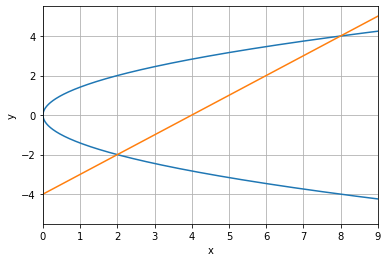

In [8]:
# 图像绘制

import matplotlib.pyplot as plt

y = np.linspace(-5, 5, 1000)
x1 = y ** 2 / 2
x2 = y + 4

plt.figure()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 9)
plt.grid(b=True)
plt.plot(x1, y)
plt.plot(x2, y)
plt.show()

变换形式：
$$\left\{
\begin{array}{lr}
    x=\frac{y^2}{2} \\
    x=y+4
\end{array}
\right.$$
$$y\in[-2,4]$$

$$S=\int_{-2}^4(y+4-\frac{y^2}{2})\mathrm{d}y=(\frac{y^2}{2}+4y-\frac{y^3}{6})|_{-2}^4=18$$

In [9]:
quad(lambda y: y + 4 - y ** 2 / 2, -2, 4)

(18.0, 1.9984014443252818e-13)